In [24]:
print("My name is {Qianyi Liu}")
print("My NetID is: {qianyil2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('hw5_treasury yield curve data.csv')
data.info()

My name is {Qianyi Liu}
My NetID is: {qianyil2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635 entries, 0 to 8634
Data columns (total 32 columns):
Date         8353 non-null object
SVENF01      8353 non-null float64
SVENF02      8353 non-null float64
SVENF03      8353 non-null float64
SVENF04      8353 non-null float64
SVENF05      8353 non-null float64
SVENF06      8353 non-null float64
SVENF07      8353 non-null float64
SVENF08      8353 non-null float64
SVENF09      8353 non-null float64
SVENF10      8353 non-null float64
SVENF11      8353 non-null float64
SVENF12      8353 non-null float64
SVENF13      8353 non-null float64
SVENF14      8353 non-null float64
SVENF15      8353 non-null float64
SVENF16      8353 non-null float64
SVENF17      8353 non-null float64
SVENF18      8353 non-null float64
SVENF19      8353 non-null float64
SVENF20      8353 non-null float64
S

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


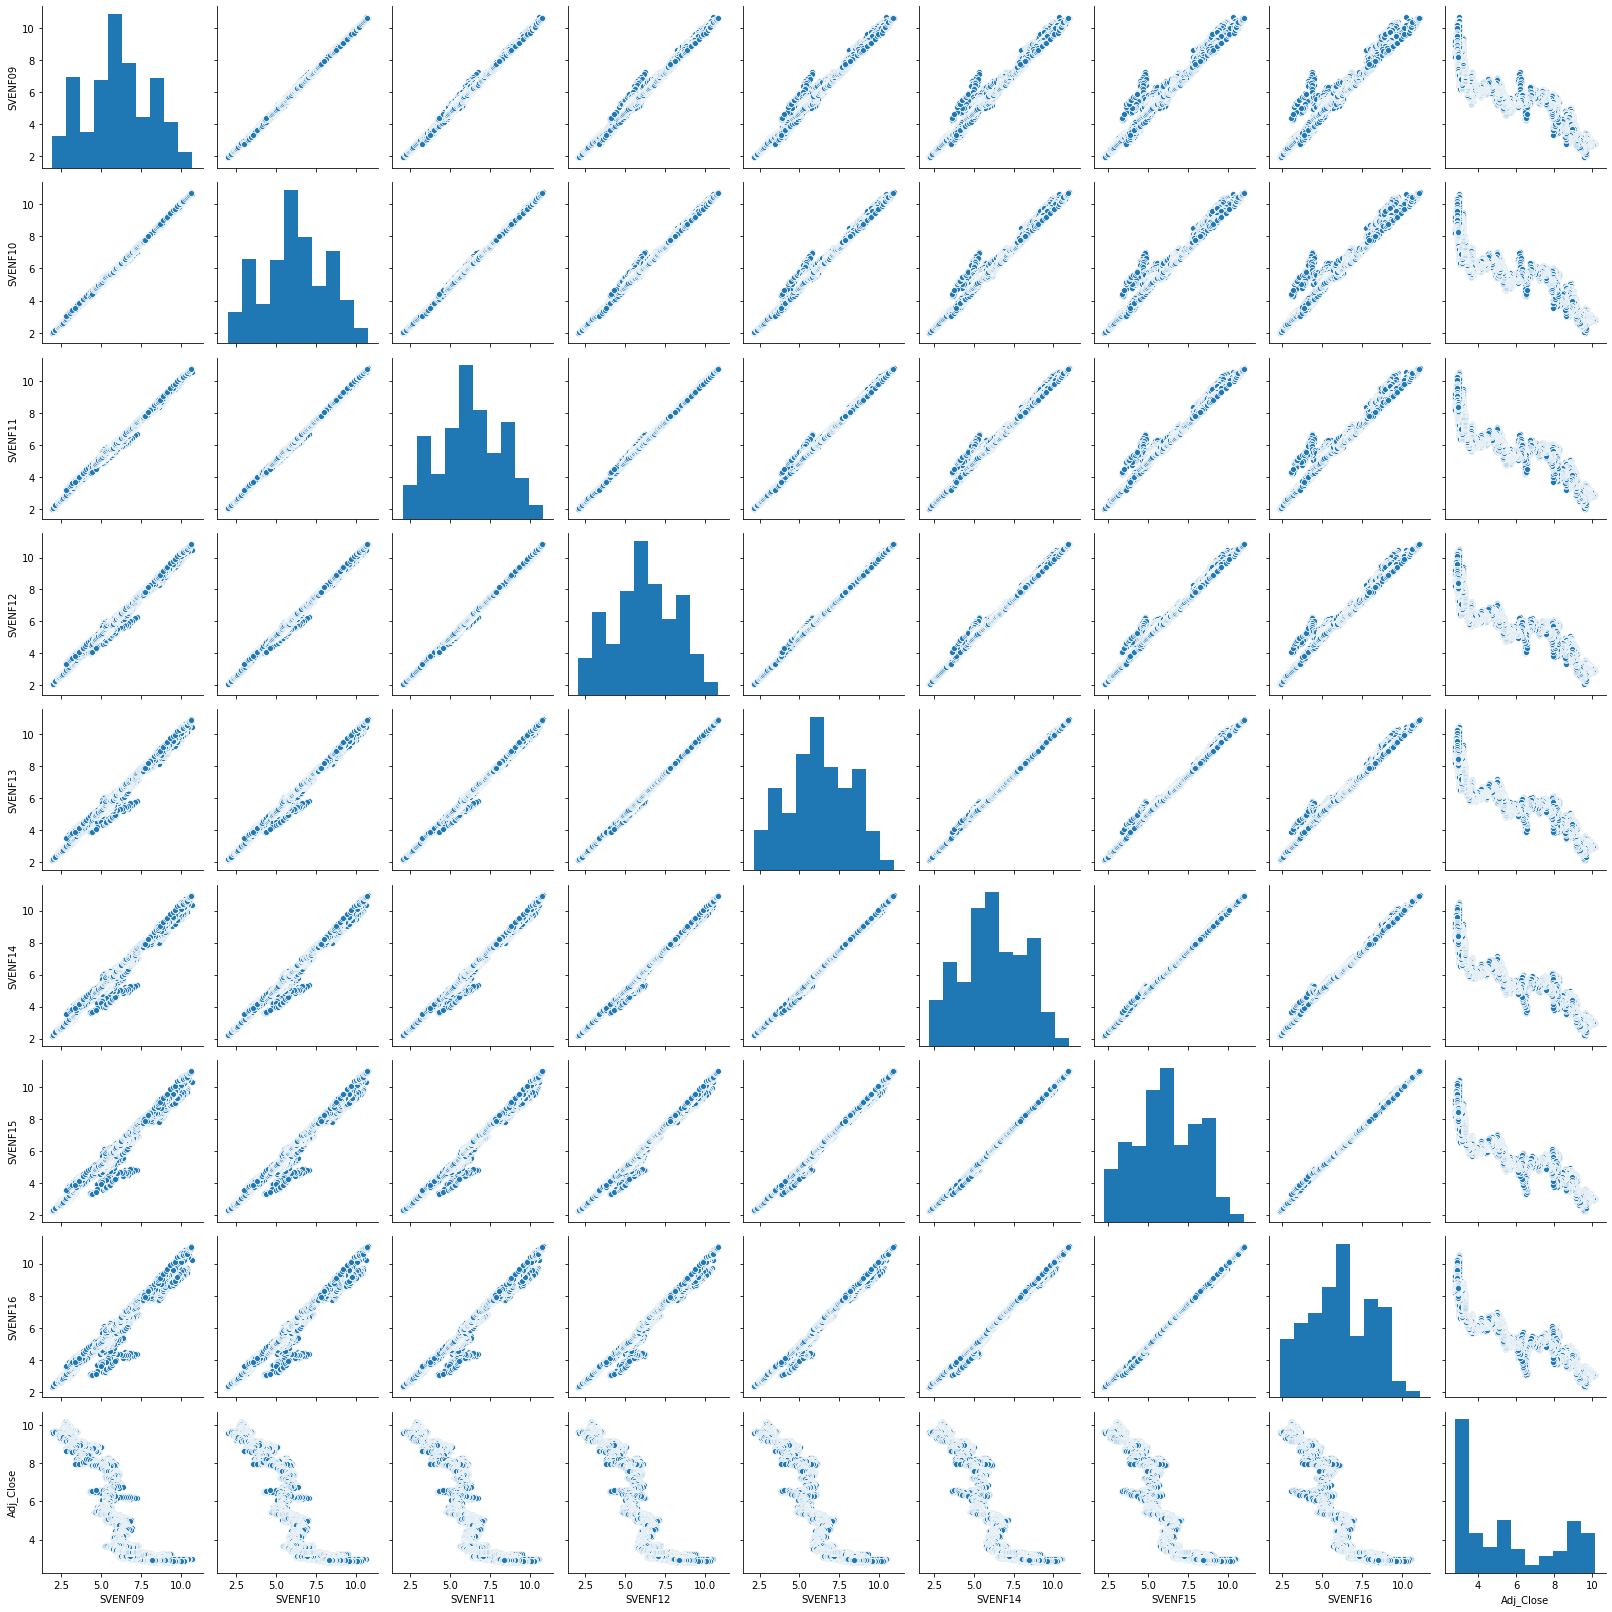

In [2]:
cols = ['SVENF09','SVENF10','SVENF11','SVENF12','SVENF13','SVENF14','SVENF15','SVENF16','Adj_Close']
sns.pairplot(data[cols], height=2.5)
plt.tight_layout()
plt.show()

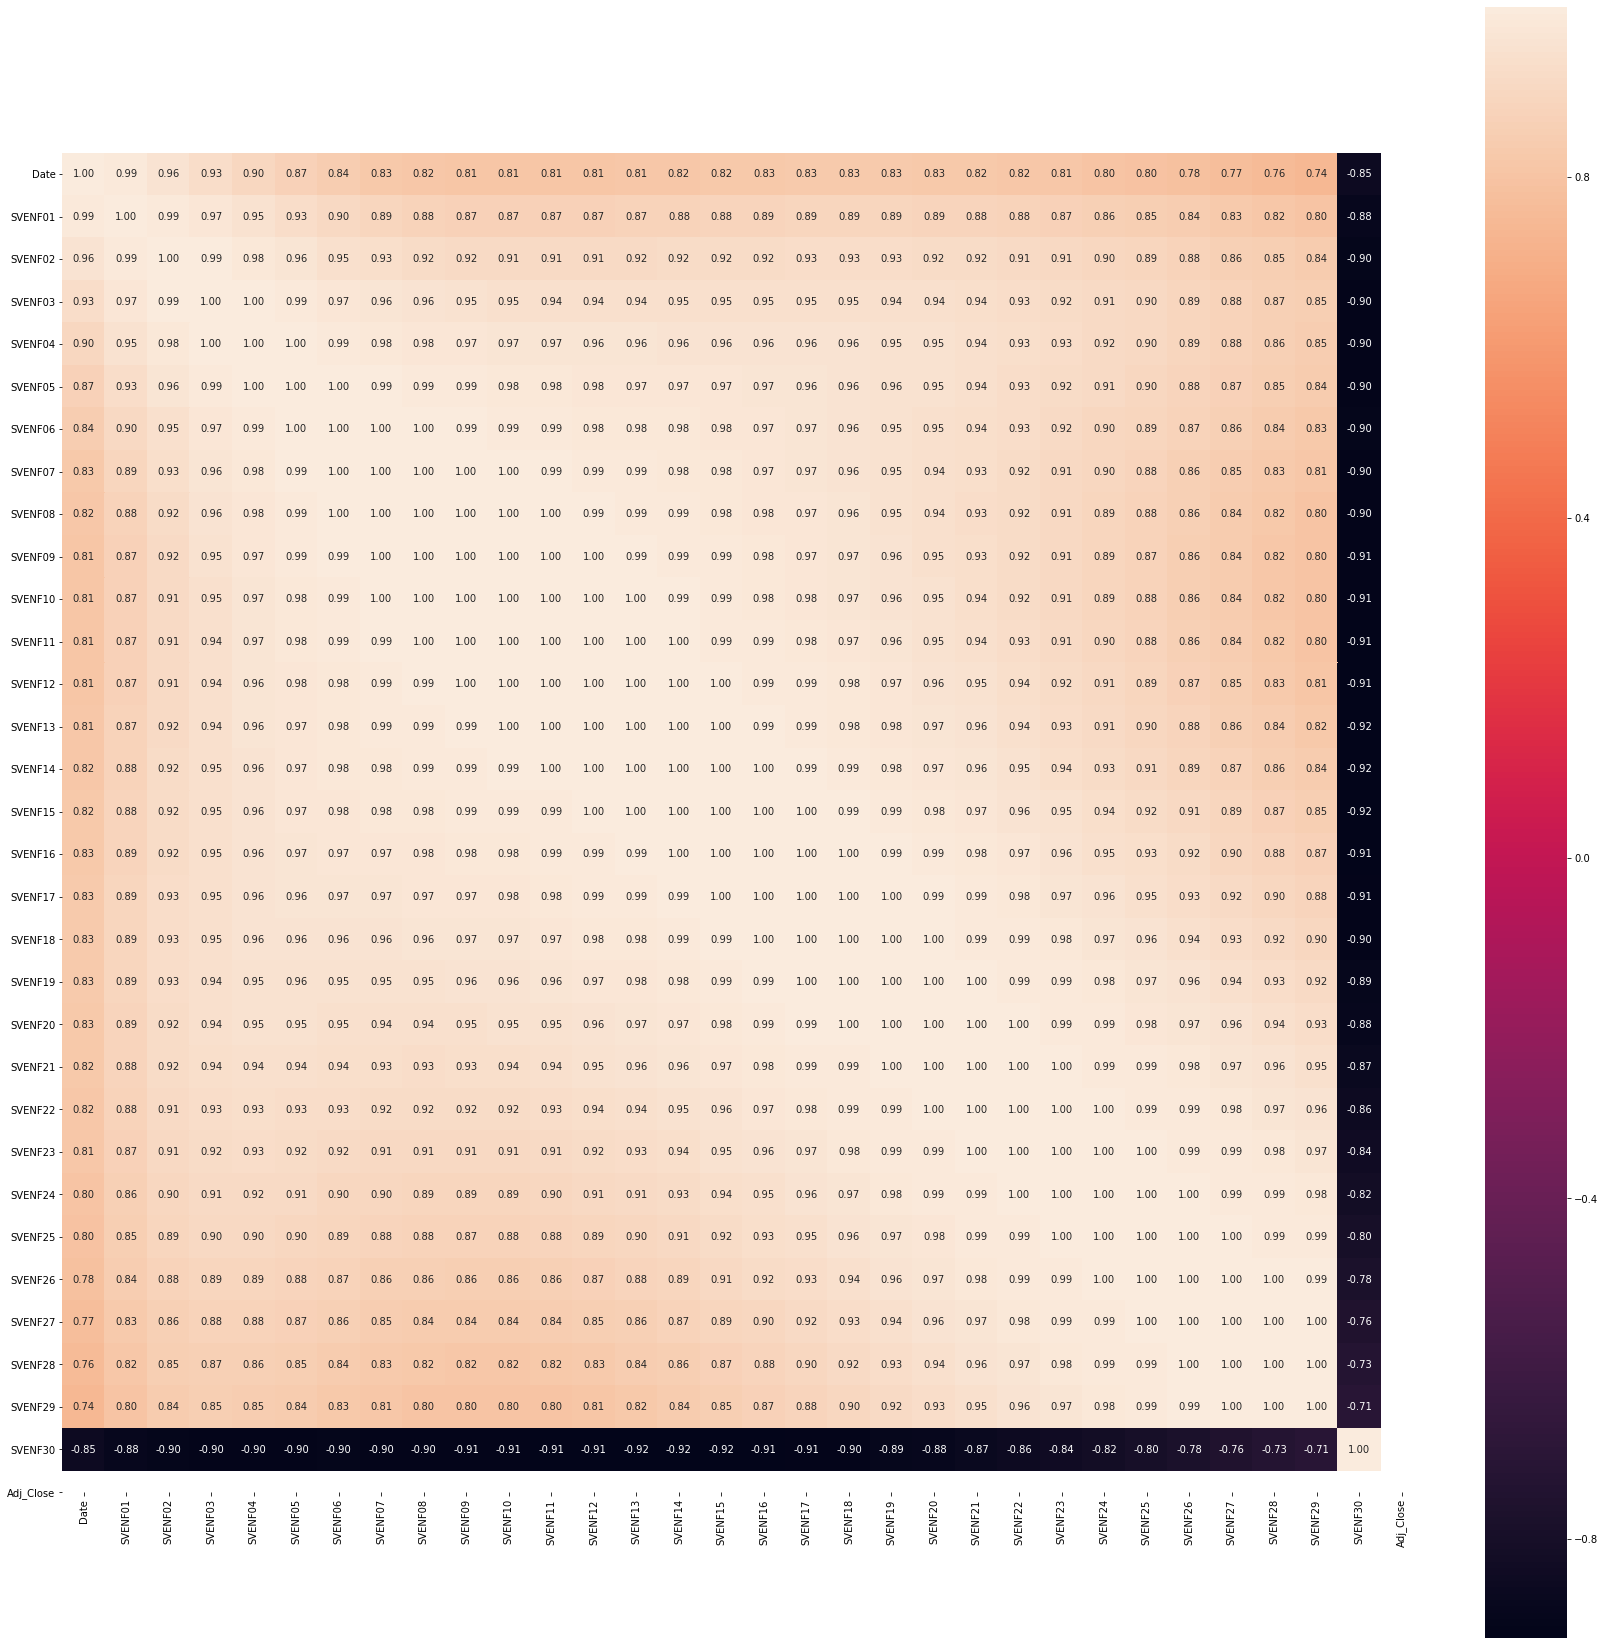

In [5]:
#Heatmap
corMat=pd.DataFrame(data.corr())
plt.figure(figsize=(30,30))
hm = sns.heatmap(corMat,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=data.columns,xticklabels=data.columns)
plt.show()

# Standarlization

In [50]:

data.dropna(inplace=True)
data.head()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X=data[data.columns[:-1]].values
y=data['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)




print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)
# Standardize the features
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = mms.fit_transform(y_train)
y_test = mms.transform(y_test)

Shape of X_train:  (6860, 30)
Shape of y_train:  (6860,)
Shape of X_test:  (1211, 30)
Shape of y_test:  (1211,)


In [52]:

from sklearn.model_selection import *
from sklearn import linear_model
def train_and_evaluate(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
 # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(5, shuffle=True,random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

clf_sgd = linear_model.SGDRegressor(loss='squared_loss',
penalty=None,  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)

Coefficient of determination on training set: 0.8848952926335845
Average coefficient of determination using 5-fold crossvalidation: 0.8875469969296741


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

# Linear Regression( no PCA)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import time

start=time.clock()
slr = LinearRegression()
slr.fit(X_train,y_train)
end=time.clock()
print('coefficient: ', slr.coef_)
print('intercept: ', slr.intercept_)
print('R2 training: ', slr.score(X_train, y_train))
print('MSE training: ', mean_squared_error(slr.predict(X_train), y_train))
print('R2 testing : ', slr.score(X_test, y_test))
print('MSE testing : ', mean_squared_error(slr.predict(X_test), y_test))
print('Run time: ', end - start, 's')

coefficient:  [[  -1.74209314   18.05601776  -79.50362437  178.28689279 -199.58179055
    64.47665974   80.18558906  -82.65661605  -11.96186441   85.67966428
   -76.32217113   52.50255604   -0.23207591  -22.41199213  -24.70499289
    -1.90320888  -76.1229696    54.10702262   34.00038232   33.014706
   138.49961127  -95.08318819   43.1476239  -102.49449768 -195.04972914
    58.72040574   25.36791629  208.50203185  -20.1023629   -84.92582726]]
intercept:  [0.36699988]
R2 training:  0.9022730353400433
MSE training:  0.011168371625324074
R2 testing :  0.9041309535337678
MSE testing :  0.011333378320071747
Run time:  0.012301999999998259 s


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


# SVR ( no PCA)

In [64]:

from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train,y_train)
start= time.clock()

print('intercept: ', svr.intercept_)
print('R2 training: ', svr.score(X_train, y_train))
print('RMSE training: ', np.sqrt(mean_squared_error(svr.predict(X_train), y_train)))
print('R2 testing : ', svr.score(X_test, y_test))
print('RMSE testing : ', np.sqrt(mean_squared_error(svr.predict(X_test), y_test)))
end = time.clock()
print("Run time", end - start,'s')

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


intercept:  [0.46107123]
R2 training:  0.9801625228846407
RMSE training:  0.04761359161360448
R2 testing :  0.9815563011489163
RMSE testing :  0.04669436786503233
Run time 0.12044099999999958 s


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


# With PCA

In [65]:

from sklearn.decomposition import PCA
pca_1 = PCA()
pca_1.fit(X)
print('Explained variance ratio: ', pca_1.explained_variance_ratio_)

Explained variance ratio:  [9.25027254e-01 3.77198563e-02 3.11962115e-02 5.11829721e-03
 8.45006479e-04 8.14071111e-05 1.06386900e-05 1.23073879e-06
 8.99497477e-08 7.14094977e-09 4.89071592e-10 3.83422436e-11
 8.63162713e-12 7.54060102e-12 7.44722038e-12 7.41409677e-12
 7.37633844e-12 7.36922042e-12 7.21033060e-12 7.16011018e-12
 7.08499808e-12 7.01615861e-12 6.97953948e-12 6.83297854e-12
 6.78790385e-12 6.76011093e-12 6.68796631e-12 6.63106214e-12
 6.57322725e-12 6.42225375e-12]


In [66]:
#this is for the scenario that n=3
pca_2 = PCA(n_components=3)
pca_2.fit(X)
print('Explained variance ratio of the 3-component version: ', pca_2.explained_variance_ratio_)
print('Explained variance of the 3-component version: ', pca_2.explained_variance_)

Explained variance ratio of the 3-component version:  [0.92502725 0.03771986 0.03119621]
Explained variance of the 3-component version:  [107.90283548   4.39995625   3.63898432]


In [67]:
# same as above we split the data into training and testing
transformed_X = pca_2.transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(transformed_X, y, test_size=.15, random_state=42)
print('Shape of X_train_pca: ', X_train_pca.shape)
print('Shape of y_train_pca: ', y_train_pca.shape)
print('Shape of X_test_pca: ', X_test_pca.shape)
print('Shape of y_test_pca: ', y_test_pca.shape)

Shape of X_train_pca:  (6860, 3)
Shape of y_train_pca:  (6860,)
Shape of X_test_pca:  (1211, 3)
Shape of y_test_pca:  (1211,)


In [69]:
# Linear Regression（PCA where n = 3）
slr.fit(X_train_pca,y_train_pca)
start= time.clock()

print('coefficient: ', slr.coef_)
print('intercept: ', slr.intercept_)
print('R2 training: ', slr.score(X_train_pca, y_train_pca))
print('RMSE training: ', np.sqrt(mean_squared_error(slr.predict(X_train_pca), y_train_pca)))
print('R2 testing : ', slr.score(X_test_pca, y_test_pca))
print('RMSE testing : ', np.sqrt(mean_squared_error(slr.predict(X_test_pca), y_test_pca)))
end = time.clock()
print("Run time", end - start,'s')

coefficient:  [-0.2175607  -0.24624459  0.01563734]
intercept:  5.510235792123283
R2 training:  0.8673885521430046
RMSE training:  0.904712305616479
R2 testing :  0.8663783970490899
RMSE testing :  0.9236577822901372
Run time 0.012944000000004507 s


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


In [71]:
# SVR (PCA where n = 3)
svr = SVR(kernel='rbf')

svr.fit(X_train_pca,y_train_pca)
start= time.clock()

print('intercept: ', svr.intercept_)
print('R2 training: ', svr.score(X_train_pca, y_train_pca))
print('RMSE training: ', np.sqrt(mean_squared_error(svr.predict(X_train_pca), y_train_pca)))
print('R2 testing : ', svr.score(X_test_pca, y_test_pca))
print('RMSE testing : ', np.sqrt(mean_squared_error(svr.predict(X_test_pca), y_test_pca)))
end = time.clock()
print("Run time", end - start,'s')

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


intercept:  [5.0398834]
R2 training:  0.9923836631098337
RMSE training:  0.21681686571750353
R2 testing :  0.991856490701626
RMSE testing :  0.22802294653625585
Run time 0.7085259999999991 s


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
